In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical , plot_model
from tensorflow.keras.layers import Dense , Dropout ,Input , Average , Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
# load the dataset using the builtin Keras method
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('Dimensionality of the training image dataset and labels:')
print(X_train.shape)
print(y_train.shape)
print('Dimensionality of the test image dataset and labels:')
print(X_test.shape)
print(y_test.shape)

Dimensionality of the training image dataset and labels:
(60000, 28, 28)
(60000,)
Dimensionality of the test image dataset and labels:
(10000, 28, 28)
(10000,)


In [ ]:
from numpy.ma.core import size
from google.colab.patches import cv2_imshow
for i in range (20):
  cv2_imshow(X_train[20+i])

In [ ]:
X_train = X_train.astype('float32')
#y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
#y_test = y_test.astype('float32')

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
X_train[12]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

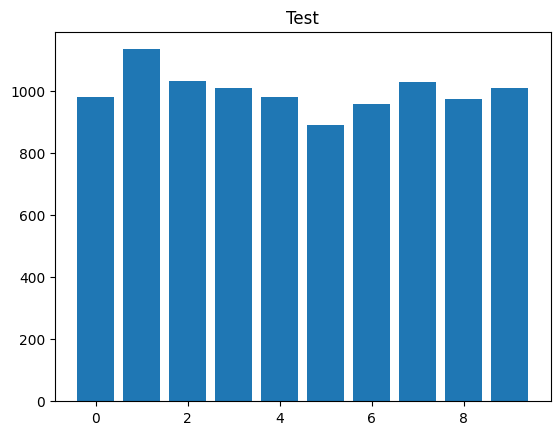

In [ ]:
c = Counter(y_test)

plt.bar(c.keys(), c.values())
plt.title("Test")
plt.show()

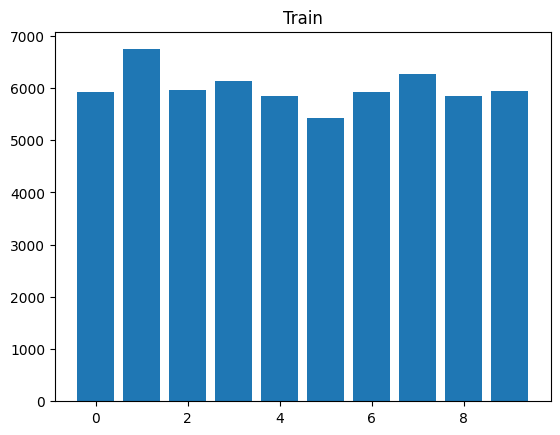

In [ ]:
c = Counter(y_train)

plt.bar(c.keys(), c.values())
plt.title("Train")
plt.show()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = X_train.reshape(-1, 1, 28, 28)
X_test = X_test.reshape(-1, 1, 28, 28)

In [ ]:
X_train.shape

(60000, 1, 28, 28)

In [ ]:
sgd = SGD(learning_rate=0.001 , momentum=0.87)
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1 , patience=3)
adam= tf.keras.optimizers.Adam(learning_rate=0.001)

input_layer = Input(shape=(1,28,28), name ="input")
hidden_layer1 = Dense(64 ,activation='linear' , name="layer1")(input_layer)
flatten_layer1 = Flatten(name="flatten1")(hidden_layer1)
hidden_layer2 = Dense(64 ,activation='linear' , name="layer2")(flatten_layer1)
flatten_layer2 = Flatten(name="flatten2")(hidden_layer2)
hidden_layer3 = Dense(64 ,activation='linear' , name="layer3")(flatten_layer2)
flatten_layer3 = Flatten(name="flatten3")(hidden_layer3)
output_layer = Dense(10 ,activation='softmax' , name="output")(flatten_layer3)

network = Model(inputs=input_layer, outputs=output_layer , name = "network1")
network.compile(optimizer=sgd , loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = network.fit(X_train,y_train , batch_size=64 , epochs=50 , validation_split=0.25 , callbacks = [es])

Epoch 1/50
704/704 [==============================] - 6s 7ms/step - loss: 0.7689 - accuracy: 0.7929 - val_loss: 0.4110 - val_accuracy: 0.8843
Epoch 2/50
704/704 [==============================] - 4s 6ms/step - loss: 0.3901 - accuracy: 0.8904 - val_loss: 0.3484 - val_accuracy: 0.9025
Epoch 3/50
704/704 [==============================] - 6s 8ms/step - loss: 0.3466 - accuracy: 0.9011 - val_loss: 0.3250 - val_accuracy: 0.9083
Epoch 4/50
704/704 [==============================] - 5s 7ms/step - loss: 0.3277 - accuracy: 0.9064 - val_loss: 0.3149 - val_accuracy: 0.9097
Epoch 5/50
704/704 [==============================] - 5s 7ms/step - loss: 0.3159 - accuracy: 0.9094 - val_loss: 0.3056 - val_accuracy: 0.9131
Epoch 6/50
704/704 [==============================] - 5s 7ms/step - loss: 0.3080 - accuracy: 0.9118 - val_loss: 0.3014 - val_accuracy: 0.9141
Epoch 7/50
704/704 [==============================] - 5s 7ms/step - loss: 0.3021 - accuracy: 0.9135 - val_loss: 0.2967 - val_accuracy: 0.9164
Epoch 

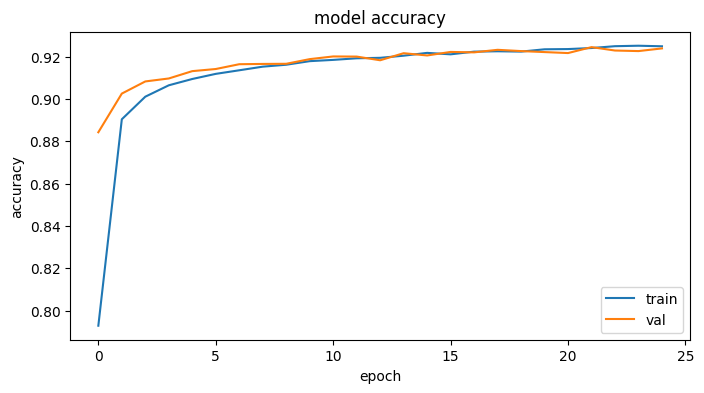

In [ ]:
plt.figure(figsize = (8,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

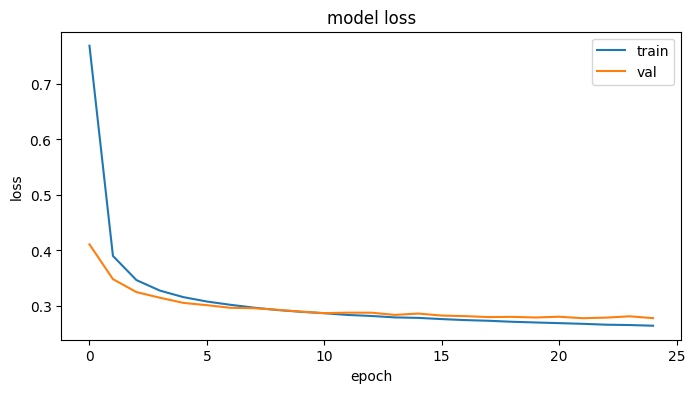

In [ ]:
plt.figure(figsize = (8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
y_predection = network.predict(X_test)
print(y_predection)
prediction = np.argmax(y_predection, axis=1)
print(prediction)

313/313 [==============================] - 1s 2ms/step
[[5.47580976e-06 1.17380577e-10 2.31328413e-05 ... 9.94299054e-01
  5.48798516e-06 3.91282520e-04]
 [8.18763045e-04 8.18030094e-06 9.87036347e-01 ... 9.07048143e-17
  6.19326951e-04 8.68096046e-12]
 [8.83606560e-07 9.83271837e-01 6.67020772e-03 ... 2.67854868e-03
  2.41641467e-03 2.75354367e-04]
 ...
 [1.73328409e-08 4.14718428e-08 6.30250906e-06 ... 4.81896423e-04
  8.70260224e-03 1.24150645e-02]
 [1.02719798e-06 1.00765355e-05 2.55490545e-06 ... 1.42349450e-07
  3.04917302e-02 1.10196788e-06]
 [1.22794254e-05 6.85562935e-13 1.02505292e-04 ... 6.51383895e-12
  3.61836328e-07 1.01379727e-09]]
[7 2 1 ... 4 5 6]


In [ ]:
finalperdict = metrics.accuracy_score(y_test, prediction)
round(finalperdict*100,2)

92.37